In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
plt.rcParams['figure.figsize'] = [16, 6]

# Simulating a Markov chain

Simulate the continuous-time Markov chain on $\{1, 2, \ldots, N\}$
with jump rates 
$$  G_{xy} = \begin{cases} y \qquad &\text{for } y < x \\ 1 \qquad &\text{for } y = N \end{cases} $$
and $G_{xy} = 0$ otherwise.
(Given a time $T$, you should compute the list of all jump times $t_1 < t_2 < \cdots < T$
and values at those times $X(0), X(t_1), X(t_2), \ldots, X(t_n)$.)


**General-purpose solution:**

Whenever we are in state $x$, the total jump rate is
$$
   \lambda_x = - G_{xx} = 1 + \sum_{y < x} y = 1 + \frac{x(x-1)}{2} .
$$
So, we need to wait an Exponential($\lambda_x$) time,
then jump to a new state, choosing $y$ with probability $y / \lambda_x$ (if $y < x$)
or $1 / \lambda_x$ (if $y = N$).

In [42]:
import numpy as np

X0 = 1
T = 40
N = 5
t = 0.0
x = X0
jump_times = [t]
jump_positions = [x]
while t < T:
    lambda_x = 1 + x * (x-1)/2
    jump_time = np.random.exponential(scale=1/lambda_x)
    jump_locs = np.concatenate([np.arange(1, x), [N]])
    jump_probs = [y/lambda_x for y in range(1, x)] + [1/lambda_x]
    assert(np.allclose(sum(jump_probs), 1.0))
    assert(abs(sum(jump_probs) - 1.0) < 1e-12)
    new_loc = np.random.choice(jump_locs, size=1, p=jump_probs)[0]
    x = new_loc
    t += jump_time
    jump_positions.append(x)
    jump_times.append(t)



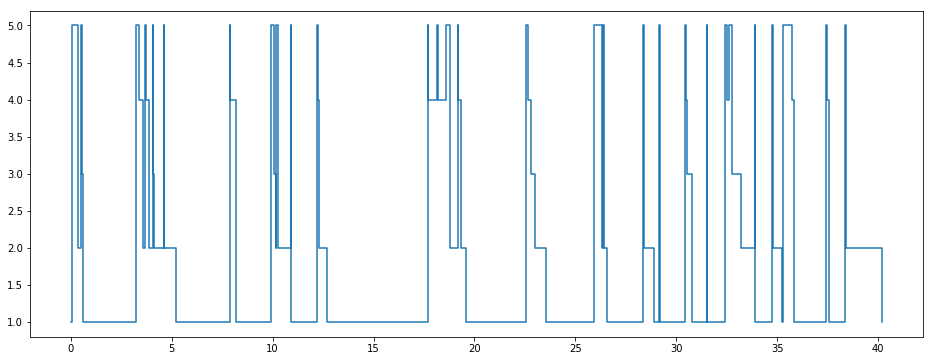

In [43]:
fig, ax = plt.subplots()
ax.step(jump_times, jump_positions, where='post')

**"Clever" solution:**

Notice that the jump rate to a particular location is *always* the same, if it's allowed.
This means that we can (a) first simulate separate PPP for each possible state,
then when at $x$, jump to whichever other state that it's allowed to jump to has a point in its PPP first.
(This might be more clever but it's not easier or more efficient.)

Said another way, the chain jumps every time one of the "lower" states has a point,
or when the "top" state has a point.

# Simulating a Poisson process

Simulate the Poisson point process on $[0, 10]^2$ with mean intensity $xy \, dx \, dy$.
(You should compute a list of the coordinates of the points, $(x_i, y_i)$.)

**Solution:**

Notice that
$$  \int_0^x u du = \frac{x^2}{2} . $$
The total number of points is Poisson with mean
$$
 \int_0^{10} \int_0^{10} xy dx dy = \left(\frac{100}{2}\right)^2 = 2500 .
$$
Each point is then chosen unformly from the square with the probability density $xy / 2500 = (x/50)(y/50)$.
Let a point be $(X, Y)$;
since this is a product measure, we can pick $X$ and $Y$ independently,
with probability density $x/50$,
i.e.,
$$
\mathbb{P}\{X < x\} = \int_0^x \frac{u}{50} du = \frac{x^2}{100} .
$$
(Two random variables with a joint probability density are independent if and only if
that probability density is of product form: $f_{X,Y}(x,y) = f_X(x) f_Y(y)$.)

How to simulate $X$?

1. Note that if $U$ is Uniform on $[0,1]$ then if we let $X = 10 \sqrt{U}$ then
$$ \mathbb{P}\{ X \le x \} = \mathbb{P}\{ 10 \sqrt{U} \le x \} = \mathbb{P}\{ U \le x^2 /100 \} = x^2 /100 .$$

2. Consider the triangle; let $U$ and $V$ be independent Uniform on $[0, 1]$
   and $X = 10 \max(U, V)$.

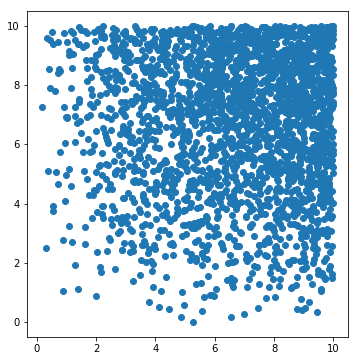

In [47]:
num_points = np.random.poisson(lam=2500, size=1)
XY = 10 * np.column_stack([np.sqrt(np.random.uniform(size=num_points)),
                           np.sqrt(np.random.uniform(size=num_points))])

fig, ax = plt.subplots()
ax.set_aspect(1)
ax.scatter(XY[:, 0], XY[:, 1])